# Class 3: Data Wrangling and Exploratory Data Analysis

## Learning Objectives:

By the end of today's class you will be able to:

- Begin to explore social science questions using the Statistics Canada Time Use Survey

- Select rows using multiple conditions

- Create a new column in a `pandas` DataFrame

- Understand and implement crosstabulation in `pandas`

- crosstabulation 

- counts and bar plots using `pandas`

<!--

- Explore data in the Statistics Canada Time Use Survey using the pandas library

- Define statistical variables from data using Python.

- Select rows (also called subgroups) and columns of a pandas data frame.

- Understand how to use Boolean expressions in Python to select subgroups.

- Understand the difference between categorical (nominal and ordered) , and interval variables.

- Create numerical and visual data summaries of categorical variables using Python.

- Understand how to interpret categorical variables and bar charts in context.
-->


<!--
- Create numerical and visual data summaries of categorical and interval variables using Python: bar charts; histograms; and cumulative frequency distributions.

- Understand how to interpret data using numerical and visual data summaries.

- Understand how to compute and interpret frequency and cumulative frequency distributions.

- Understand strategies on managaing missing values and the implications on data interpretations.
-->

# Let's review some of the tools we have been using
## Dataset for today's class 

The Statistics Canada General Social Survey's (GSS) Time Use (TU) Survery Main File. This is the same data we used last week.

<!--
![Alt Text](https://media.giphy.com/media/iE4lKpKqwe7QIQCPjG/giphy.gif)
-->

In [207]:
import pandas as pd
time_use_data = pd.read_csv('gss_tu2016_main_file.csv')

In [77]:
time_use_data.head()

,CASEID,pumfid,wght_per,survmnth,wtbs_001,agecxryg,agegr10,agehsdyc,ageprgrd,chh0014c,...,ree_02,ree_03,rlr_110,lan_01,lanhome,lanhmult,lanmt,lanmtmul,incg1,hhincg1
0,10000,10000,616.6740,7,305.1159,96,5,62,96,0,...,1,1,1,1,1,1,1,1,1,1
1,10001,10001,8516.6140,7,0.0000,6,5,32,5,0,...,5,6,3,1,5,2,5,2,5,8
2,10002,10002,371.7520,1,362.7057,2,4,9,10,3,...,5,1,1,1,1,1,1,1,3,8
3,10003,10003,1019.3135,3,0.0000,96,6,65,96,0,...,3,2,2,1,1,1,1,1,2,2
4,10004,10004,1916.0708,9,11388.9706,96,2,25,96,0,...,9,99,9,9,99,9,99,9,2,4


- A DataFrame is a rectangular table of data and contains columns, each of which can be a different value type (numeric, string, boolean, etc.). 

- The rows and columns can be selected from DataFrames using various functions in the pandas library.

- How many columns are in this data set?

In [78]:
len(time_use_data.columns)

350

# Selecting Columns from a pandas data frame

## Do urban residents with more children report feeling more rushed than those with fewer children?

In order to create an easy to use data set we will only keep the following columns:

- `CASEID` (participant ID), 
- `luc_rst` (large urban centre vs rural and small towns), 
- `agegr10` (age group), 
- `marstat` (marital status), 
- `sex` (sex), 
- `chh0014c` (number of kids 14 or under), 
- `gtu_110` (feeling rushed), and 
- `dur01` (duration spent sleeping). 

Let's put all these column names in a list called `important_columns`.

In [79]:
important_columns = ["CASEID","luc_rst","agegr10","marstat","sex",
                     "chh0014c","gtu_110","dur01"]

In [80]:
subset_time_use_data = time_use_data[important_columns]
subset_time_use_data.head()

,CASEID,luc_rst,agegr10,marstat,sex,chh0014c,gtu_110,dur01
0,10000,1,5,5,1,0,1,510
1,10001,1,5,1,1,0,3,420
2,10002,1,4,1,2,3,1,570
3,10003,1,6,5,2,0,2,510
4,10004,1,2,6,1,0,1,525


- This is one way to select columns from a pandas dataframe.

## Rename columns so that they are meaningful

- It's possible and desireable to add meaningful names to the columns that describe the variables of interest.

- <mark> Why? </mark>

- Use the `rename` function to rename columns.

- But, first create a <mark> ?? </mark> that associates the original column names to the new column names.

In [81]:
columnnames = {'CASEID': 'Participant ID',
               'luc_rst': 'Urban/Rural',
               'agegr10': 'Age Group',
               'marstat': 'Marital Status',
               'sex': 'sex',
               'chh0014c': 'Kids under 14',
               'gtu_110': 'Feeling Rushed',
               'dur01': 'Sleep duration'}

In [82]:
# this is good for printing nice tables

subset_time_use_data_colnames = subset_time_use_data.rename(columns=columnnames)

What's happened so far?

1.  The csv (comma separated value) file named `gss_tu2016_main_file.csv` was read into python using the pandas function `read_csv()`

2. Eight columns were selected and a new data frame was created called `subset_time_use_data`.

3. The column names in `subset_time_use_data` were renamed so that they are meaningful (i.e., represent the measurement/context).

4. The data frame with the renamed columns was assigned the name `subset_time_use_data_colnames`.

So, let's check the column names of `subset_time_use_data_colnames`.

In [189]:
list(subset_time_use_data_colnames)

['Participant ID',
 'Urban/Rural',
 'Age Group',
 'Marital Status',
 'sex',
 'Kids under 14',
 'Feeling Rushed',
 'Sleep duration']

## &#9989; Self check 

- What is the data type of `list(subset_time_use_data_colnames)`?  

- What python function can be used to check the number columns in `list(subset_time_use_data_colnames)`?

# DataFrame `shape`

The `DataFrame.shape` function computes `(the number of rows, number of columns)` in a `pandas` DataFrame.

In [190]:
subset_time_use_data_colnames.shape

(17390, 8)

There are 17390 rows and 8 columns in `subset_time_use_data_colnames`.

# Back to the question ...

**Do urban residents with more children report feeling more rushed than those with fewer children?**

But, let's narrow the question even further ...

**Do middle age urban residents with more children report feeling more rushed than those with fewer children?**

In [191]:
list(subset_time_use_data_colnames)

['Participant ID',
 'Urban/Rural',
 'Age Group',
 'Marital Status',
 'sex',
 'Kids under 14',
 'Feeling Rushed',
 'Sleep duration']

Question: Which variables should we focus on?

In [192]:
# add variables here



## Which observations do we want in the data set?

Middle age people that live in an urban centre.

How can these observations be selected using python?

The column names were changed to ..

```
columnnames = {'CASEID': 'Participant ID',
               'luc_rst': 'Urban/Rural',
               'agegr10': 'Age Group',
               'marstat': 'Marital Status',
               'sex': 'sex',
               'chh0014c': 'Kids under 14',
               'gtu_110': 'Feeling Rushed',
               'dur01': 'Sleep duration'}

```

From the code book

```
 luc_rst            Population centre indicator

           VALUE  LABEL
               1  Larger urban population centres (CMA/CA)
               2  Rural areas and small population centres (non CMA/CA)
               3  Prince Edward Island
               6  Valid skip
               7  Don't know
               8  Refusal
               9  Not stated

           Data type: numeric
           Missing-data codes: 6-9
           Record/column: 1/59

```

```
 chh0014c           Child(ren) in household - 0 to 14 years

           VALUE  LABEL
               0  None
               1  One
               2  Two
               3  Three or more
               6  Valid skip
               7  Don't know
               8  Refusal
               9  Not stated

           Data type: numeric
           Missing-data codes: 6-9
           Record/column: 1/40

```

```
 agegr10            Age group of respondent (groups of 10)

           VALUE  LABEL
               1  15 to 24 years
               2  25 to 34 years
               3  35 to 44 years
               4  45 to 54 years
               5  55 to 64 years
               6  65 to 74 years
               7  75 years and over
              96  Valid skip
              97  Don't know
              98  Refusal
              99  Not stated

           Data type: numeric
           Missing-data codes: 96-99
           Record/column: 1/35

```

```

      gtu_110            General time use - Feel rushed

           VALUE  LABEL
               1  Every day
               2  A few times a week
               3  About once a week
               4  About once a month
               5  Less than once a month
               6  Never
              96  Valid skip
              97  Don't know
              98  Refusal
              99  Not stated

           Data type: numeric
           Missing-data codes: 96-99
           Record/columns: 1/60-61

```

In [193]:
urban = (subset_time_use_data_colnames["Urban/Rural"] == 1)
urban.head()

0    True
1    True
2    True
3    True
4    True
Name: Urban/Rural, dtype: bool

In [194]:
sum(urban)

13319

Instead of using `sum()` we can use the pandas function `value_counts()`.

In [195]:
urban.value_counts()

True     13319
False     4071
Name: Urban/Rural, dtype: int64

Let's categorize families as either having no children or at least one child.

We can select observations with no children.

In [196]:
no_kid = subset_time_use_data_colnames['Kids under 14']  == 0

no_kid.value_counts()

True     13832
False     3558
Name: Kids under 14, dtype: int64

So, there are 13832 people with no kids.

How about observations with at least one child?

In [114]:
(subset_time_use_data_colnames['Kids under 14']  > 0).head()

0    False
1    False
2     True
3    False
4    False
Name: Kids under 14, dtype: bool

Is this correct?

- All values greater than 3 are essentially missing for various reasons.

- We want rows where `Kids under 14 == 1` **or** `Kids under 14 == 2` **or** `Kids under 14 == 3`

- This can be expressed in `pandas` using `|` for **or**.


In [115]:
one_kid = subset_time_use_data_colnames['Kids under 14'] == 1
two_kid = subset_time_use_data_colnames['Kids under 14'] == 2
three_kid = subset_time_use_data_colnames['Kids under 14'] == 3

kid1 = one_kid | two_kid | three_kid
kid1.value_counts()

False    13832
True      3558
Name: Kids under 14, dtype: int64

So, there are 3558 with at least one kid.  How many are observations are missing?

# Creating A New DataFrame Column

Let's create a new column called `kids_YN` in the `subset_time_use_data_colnames` that records if a person has either 0 kids or at least one kid.

The *type* of `kids_YN` will be Boolean: `True` when there are at least one kid, and `False` if there are no kids.

`kids_YN` will be added to a copy of `subset_time_use_data_colnames`.

The syntax for creating a new column in a `DataFrame` called `df` is:

`df.loc[condition, 'New Column Name'] = value`

NB: there are other several other ways to add new variables to a DataFrame. 

Step 1: Make a copy of the DataFrame

In [118]:
subset_time_use_data_kids = subset_time_use_data_colnames.copy()

Step 2: Assign the values 
   + `False` when `no_kid == True`
   + `True` when `kid1 == True`

In [119]:
subset_time_use_data_kids.loc[no_kid, 'kids_YN'] = False
subset_time_use_data_kids.loc[kid1, 'kids_YN'] = True
subset_time_use_data_kids.head()

,Participant ID,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,kids_YN
0,10000,1,5,5,1,0,1,510,False
1,10001,1,5,1,1,0,3,420,False
2,10002,1,4,1,2,3,1,570,True
3,10003,1,6,5,2,0,2,510,False
4,10004,1,2,6,1,0,1,525,False


Now, we have a new column called `kids_YN` in a copy of `subset_time_use_data_kids`.

In [120]:
subset_time_use_data_kids['kids_YN'].value_counts()

False    13832
True      3558
Name: kids_YN, dtype: int64

The Boolean variable `urban` can be used to select rows of `subset_time_use_data_colnames` corresponding to urban residents.

# What about Urban and Middle Age?

The question was: **Do middle age urban residents with more children report feeling more rushed than those with fewer children?**

So, we want to select observations that are middle age and live in an urban area.  

In a previous cell we defined `urban` as a Boolean that is `True` if an observation lives in an urban area.  

We can do the same with `Age Group`.

According to [Wikipedia](https://en.wikipedia.org/wiki/Middle_age) middle age is 45 - 65.  This corresponds to age groups 4 **or** 5.

In [131]:
agegroup4 = subset_time_use_data_kids['Age Group'] == 4

agegroup5 = subset_time_use_data_kids['Age Group'] == 5

middle_age = agegroup4 | agegroup5

middle_age.value_counts()

False    10860
True      6530
Name: Age Group, dtype: int64

In [132]:
subset_time_use_data_kids[urban == True].head()

,Participant ID,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,kids_YN
0,10000,1,5,5,1,0,1,510,False
1,10001,1,5,1,1,0,3,420,False
2,10002,1,4,1,2,3,1,570,True
3,10003,1,6,5,2,0,2,510,False
4,10004,1,2,6,1,0,1,525,False


## Selecting Urban **and** Middle Age

To select rows where `urban == True` **and** `middle_age == True` we can use `&` in `pandas`.

In [134]:
middle_age_and_urban = middle_age & urban
middle_age_and_urban.value_counts()

False    12516
True      4874
dtype: int64

Now, let's use this new Boolean variable to select rows that are middle age and urban

In [184]:
subset_time_use_data_kids.loc[middle_age_and_urban,]

,Participant ID,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,kids_YN
0,10000,1,5,5,1,0,1,510,False
1,10001,1,5,1,1,0,3,420,False
2,10002,1,4,1,2,3,1,570,True
7,10007,1,5,3,2,0,5,440,False
15,10015,1,5,3,1,0,1,570,False
...,...,...,...,...,...,...,...,...,...
17373,27373,1,5,6,2,0,5,615,False
17375,27375,1,5,6,2,0,6,720,False
17383,27383,1,5,3,2,0,6,510,False
17386,27386,1,5,6,1,0,2,600,False


```

      gtu_110            General time use - Feel rushed

           VALUE  LABEL
               1  Every day
               2  A few times a week
               3  About once a week
               4  About once a month
               5  Less than once a month
               6  Never
              96  Valid skip
              97  Don't know
              98  Refusal
              99  Not stated

           Data type: numeric
           Missing-data codes: 96-99
           Record/columns: 1/60-61

```

So, let's compare feeling rushed at least once per week to less than once per week.

In [205]:
subset_time_use_data_kids['Feeling Rushed'].value_counts()

1     5130
2     4925
3     2634
6     2475
4     1423
5      741
97      60
98       2
Name: Feeling Rushed, dtype: int64

In [206]:
rush_wk1 = ((subset_time_use_data_kids['Feeling Rushed'] == 1) | 
             (subset_time_use_data_kids['Feeling Rushed'] == 2) | 
             (subset_time_use_data_kids['Feeling Rushed'] == 3))

rush_wk0 = ((subset_time_use_data_kids['Feeling Rushed'] == 4) | 
             (subset_time_use_data_kids['Feeling Rushed'] == 5) | 
             (subset_time_use_data_kids['Feeling Rushed'] == 6))

In [147]:
subset_time_use_data_kids_rush = subset_time_use_data_kids.copy()

subset_time_use_data_kids_rush.loc[rush_wk1, 'FeelRush_YN'] = True
subset_time_use_data_kids_rush.loc[rush_wk0, 'FeelRush_YN'] = False
subset_time_use_data_kids_rush

,Participant ID,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,kids_YN,FeelRush_YN
0,10000,1,5,5,1,0,1,510,False,True
1,10001,1,5,1,1,0,3,420,False,True
2,10002,1,4,1,2,3,1,570,True,True
3,10003,1,6,5,2,0,2,510,False,True
4,10004,1,2,6,1,0,1,525,False,True
...,...,...,...,...,...,...,...,...,...,...
17385,27385,1,1,6,2,0,5,560,False,False
17386,27386,1,5,6,1,0,2,600,False,True
17387,27387,1,7,3,2,0,3,510,False,True
17388,27388,1,6,2,2,0,6,785,False,False


# Crosstabulation

- `FeelRush_YN` is a Boolean variable that classifies people as feeling rushed at least once per week, and `kids_YN` is a Boolean variable that classifies people as having at least one kid. 

- These two variables can be used to **cross-classify** feeling rushed and having kids.  There are four possibilities:


`kids_YN`     | `FeelRush_YN` | Number of observations
--------------|-----------|------
`False`       | `False`   | A
`False`       | `True`    | B
`True `       | `False`   | C
`True`        | `True`    | D

- How can we use python to calculate A, B, C, D?

- This occurs so often that `pandas` has a function called `crosstab` to do this.

In [181]:
pd.crosstab(subset_time_use_data_kids_rush['kids_YN'], 
            subset_time_use_data_kids_rush['FeelRush_YN'])

FeelRush_YN,False,True
kids_YN,,
False,4357,9419
True,282,3270


Now, we know the values of A, B, C, D


`kids_YN`     | `FeelRush_YN` | Number of observations
--------------|-----------|------
`False`       | `False`   | 4357
`False`       | `True`    | 9419
`True `       | `False`   | 282
`True`        | `True`    | 3270

What proportion of people that have kids feel rushed?

What proportion of people that have don't have kids feel rushed?

There are 282 + 3270 = 3552 people with kids and 3270 of these people feel rushed or 3270/3552 = 0.92

There are 4357 + 9419 = 13776 people with no kids and 9419 of these people feel rushed or 9419/13776 = 0.68

92% of people with kids feel rushed at least once per week compared to 68% of people with no kids feel. Having kids is associated with 24% more people feeling rushed in this survey.

The `normalize` parameter can be used to get the column (use argument `column`) or row (use argument `index`) percentages.

In [182]:
pd.crosstab(subset_time_use_data_kids_rush['kids_YN'], 
            subset_time_use_data_kids_rush['FeelRush_YN'], normalize = 'index')

FeelRush_YN,False,True
kids_YN,,
False,0.316275,0.683725
True,0.079392,0.920608


We can visualize this crosstabulation using a bar chart.

<AxesSubplot:xlabel='kids_YN'>

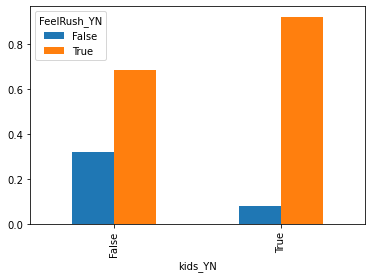

In [183]:
ct = pd.crosstab(subset_time_use_data_kids_rush['kids_YN'], 
            subset_time_use_data_kids_rush['FeelRush_YN'], normalize = 'index')
ct.plot.bar()

## Summary of Python functions/concepts used Today


<!--
- Selecting columns in a pandas dataframe using a list `['a', 'b', 'c']`.

- renaming columns in a pandas dataframe `DataFrame.rename()` using a dictionary.

- printing column names of a pandas dataframe using `list(df)`.

- print first `n` rows of a dataframe using `DataFrame.head()`.

- read a csv file `pandas.read_csv()`.

- Boolean indexing to filter rows

- Creating new variables (assignment to another column) using if-then on one column

- counts of unique rows in a dataframe `pandas.DataFrame.value_counts`

- bar plot of dataframe column `pandas.DataFrame.plot.bar`

- shape of DataFrame `pandas.DataFrame.shape`

- crosstabulation of two or more factors `pandas.crosstab`

-->